In [120]:
from math import *
import sympy as sy
from sympy import *

a,b,h,t,r,P,x,c1,c2,c3,c4,E_m,I_z,L=S('a,b,h,t,r,P,x,c1,c2,c3,c4,E_m,I_z,L')

L=11
#a=6
h=3
b=1
t=0.2
E_m=1e6
I_z=integrate(b*r*r,[r,-0.5*t,0.5*t])
P=1

sy.init_printing()

M1=P*(x-a)
M2=0

y1=integrate(integrate(M1/E_m/I_z,x)+c1,x)+c2
y2=integrate(integrate(M2/E_m/I_z,x)+c3,x)+c4


#边界条件
equ1=diff(y1,x,0).subs(x,0)-0
equ2=diff(y1,x,1).subs(x,0)-h/(2*L)
equ3=diff(y1,x,0).subs(x,a)-diff(y2,x,0).subs(x,a)
equ4=diff(y1,x,1).subs(x,a)-diff(y2,x,1).subs(x,a)

ans=solve([equ1,equ2,equ3,equ4],[c1,c2,c3,c4])
c11=ans[c1]
c22=ans[c2]
c33=ans[c3]
c44=ans[c4]

gap=y2.subs(c3,c33).subs(c4,c44).subs(x,L)*2

#PP=solve([gap-1],[P])[P]

y2=y2.subs(c3,c33).subs(c4,c44)
ya=y2.subs(x,L)
ya

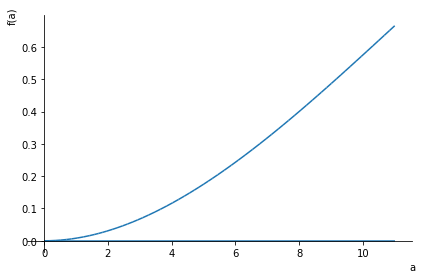

In [127]:
p=plotting.plot(1.5-ya,(a,0,L),show=False)
p1=plotting.plot(0,(a,0,L),show=False)
p.extend(p1)
p.show()

In [70]:
def yp(P,L,E,I):
    x=S('x')
    return P/(6*E*I)*(x**3-3*L*x**2)

L=11
a=6
h=3
b=1
t=0.2
E_m=1e6
I_z=integrate(b*r*r,[r,-0.5*t,0.5*t])

y3=h/2/L*x
y41=yp(P,a,E_m,I_z)
h=diff(y41,x,0).subs(x,a)
k=diff(y41,x,1).subs(x,a)
y42=h+k*(x-a)
y4=y42

(y4+y3).subs(x,L)